In [9]:
import pandas as pd
import numpy as np
import ast
import pickle
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
df = pd.read_csv("New Scrap.csv", usecols=["tweet", "Sentimen"])
df.columns = ["tweet", "sentimen"]
df['sentimen'].value_counts(ascending=True)
#df.shape

Negatif    112
Positif    119
Netral     159
Name: sentimen, dtype: int64

In [11]:
def word_rekonizing(text):
  return word_tokenize(text)

df['tweet'] = df['tweet'].apply(word_rekonizing)
datatweet = df['tweet']
datatweet.head(10)

0    [jadi, pengen, urging, kalian, aja, yang, seha...
1    [erick, thohir, mengatakan, indonesia, memilik...
2    [pemerintah, terus, berupaya, keras, untuk, me...
3    [alamdulillah, pokoknya, jgn, pernah, nyopot, ...
4                    [lanjutkan, vaksin, merah, putih]
5    [pemerintahan, jokowi, kembali, menerima, kiri...
6    [kalau, kalian, di, pekanbaru, dan, eligible, ...
7    [enggak, usah, degan, vaksin, aman, kok, ku, j...
8    [erick, thohir, terima, 8, juta, bulk, vaksin,...
9    [amankan, kebutuhan, vaksin, pemerintah, kemba...
Name: tweet, dtype: object

In [12]:
#normalisasi
norm = pd.read_excel("baru normalisasi.xlsx")

In [13]:
dict_normalisasi = {}

for index, row in norm.iterrows():
    if row[0] not in dict_normalisasi:
        dict_normalisasi[row[0]]= row[1]

def normalisasi_term(data):
    return [dict_normalisasi[term] if term in dict_normalisasi else term for term in data]

df['tweet'] = df['tweet'].apply(normalisasi_term)
df['tweet'].head(10)

0    [jadi, pengen, urging, kalian, saja, yang, seh...
1    [erick, thohir, mengatakan, indonesia, memilik...
2    [pemerintah, terus, berupaya, keras, untuk, me...
3    [alamdulillah, pokoknya, jangan, pernah, nyopo...
4                    [lanjutkan, vaksin, merah, putih]
5    [pemerintahan, jokowi, kembali, menerima, kiri...
6    [kalau, kalian, di, pekanbaru, dan, eligible, ...
7    [enggak, perlu, degan, vaksin, aman, kok, aku,...
8    [erick, thohir, terima, 8, juta, bulk, vaksin,...
9    [amankan, kebutuhan, vaksin, pemerintah, kemba...
Name: tweet, dtype: object

In [14]:
from nltk.corpus import stopwords

In [15]:
list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                      'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'kali', 'wkwkwk', 'udh',
                       'oke', 'deh', 'tu', 'jg', 'lo', 'blm', 'yaa',
                       'pas', 'gitu', 'dapet', 'anjir', 'abg', 'eh', 'tetep',' ya'])
#convert list to dictionary
list_stopwords = set(list_stopwords)

In [16]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['tweet'] = df['tweet'].apply(stopwords_removal) 


print(df['tweet'].head())

0    [pengen, urging, sehat, divaksin, please, go, ...
1    [erick, thohir, indonesia, memiliki, 759, juta...
2    [pemerintah, berupaya, keras, menghadirkan, va...
3    [alamdulillah, pokoknya, nyopot, masker, gusss...
4                    [lanjutkan, vaksin, merah, putih]
Name: tweet, dtype: object


In [17]:
#split data
x = df["tweet"]
y = df["sentimen"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
#print(x_train)
#print(y_train)

In [18]:
#sv = y_test.to_csv("ytest.csv")
dftrain = pd.concat([x_train,y_train],axis=1,ignore_index=True)
dftrain.columns = ["tweet", "sentimen"]
#dftrain.head()
dftrain['sentimen'].value_counts(ascending=True)

Negatif     88
Positif    101
Netral     123
Name: sentimen, dtype: int64

In [19]:
dftest = pd.concat([x_test,y_test],axis=1,ignore_index=True)
dftest.columns = ["tweet", "sentimen"]
#dftest.head()
dftest['sentimen'].value_counts(ascending=True)

Positif    18
Negatif    24
Netral     36
Name: sentimen, dtype: int64

In [20]:
data_xtrain = dftrain["tweet"]
data_ytrain = dftrain["sentimen"]
data_xtest = dftest["tweet"]
data_ytest = dftest["sentimen"]

In [21]:
#dftrain = pd.read_csv("training_dataset.csv", usecols=["tweet", "sentimen"])
#dftrain.columns = ["tweet", "sentimen"]
#dftrain.head(10)

In [22]:
#convert string to list
#def convert(tweets):
#    tweets = ast.literal_eval(tweets)
#    return [tweet for tweet in tweets]

#dftrain["tweet"] = dftrain["tweet"].apply(convert)
#print(dftrain["tweet"])

#print("\ntype : ", type(dftrain["tweet"]))

In [23]:
#tf 
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

dftrain['TF_dict'] = dftrain["tweet"].apply(calc_TF)
dftrain["TF_dict"]
#df["TF_dict"] = df['tweet'].apply(calc_TF)
#df["TF_dict"].head(10)

285    {'kesel': 0.058823529411764705, 'baca': 0.0588...
93                           {'wew': 0.5, 'vaksin': 0.5}
369    {'beranggapan': 0.125, 'jk': 0.125, 'vaksin': ...
211    {'kapolsek': 0.05263157894736842, 'beserta': 0...
287    {'peraih': 0.1111111111111111, 'nobel': 0.1111...
                             ...                        
127    {'belajar': 0.05, 'konspirasi': 0.05, 'salah':...
250    {'pertemuan': 0.05263157894736842, 'daring': 0...
136    {'rakyat': 0.07692307692307693, 'indonesia': 0...
58     {'mantappp': 0.3333333333333333, 'ayo': 0.3333...
71     {'jamin': 0.1111111111111111, 'vaksin': 0.2222...
Name: TF_dict, Length: 312, dtype: object

In [27]:
#idf
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF


DF = calc_DF(dftrain["TF_dict"])
#DF

In [28]:
n_document = len(df)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict
  
#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)


In [29]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
dftrain["TF-IDF_dict"] = dftrain["TF_dict"].apply(calc_TF_IDF)
dftrain["TF-IDF_dict"].head()
hasil_tfidf = dftrain["TF-IDF_dict"]
hasil_tfidf

285    {'kesel': 0.3101764446213969, 'baca': 0.286325...
93     {'wew': 2.6364997792818734, 'vaksin': 0.119649...
369    {'beranggapan': 0.6591249448204684, 'jk': 0.65...
211    {'kapolsek': 0.25618602370818855, 'beserta': 0...
287    {'peraih': 0.5858888398404163, 'nobel': 0.5858...
                             ...                        
127    {'belajar': 0.26364997792818734, 'konspirasi':...
250    {'pertemuan': 0.27752629255598665, 'daring': 0...
136    {'rakyat': 0.2818124343176651, 'indonesia': 0....
58     {'mantappp': 1.7576665195212489, 'ayo': 1.7576...
71     {'jamin': 0.5858888398404163, 'vaksin': 0.0531...
Name: TF-IDF_dict, Length: 312, dtype: object

In [83]:
# sort descending by value for DF dictionary 
sorted_DF = sorted(calc_DF(dftrain["TF_dict"][dftrain["sentimen"] == "Positif"]).items(), key=lambda kv: kv[1], reverse=True)[:10]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

dftrain["TF_IDF_Vec"] = dftrain["TF-IDF_dict"][dftrain['sentimen'] == 'Positif'].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(dftrain["TF_IDF_Vec"][dftrain['sentimen'] == 'Positif'])

print("\nmatrix size : ", len(dftrain["TF_IDF_Vec"][dftrain['sentimen'] == 'Positif']))

print first row matrix TF_IDF_Vec Series

59    [0.03988316525608247, 0.4167351393873276, 0.38...
95    [0.042229233800557923, 0.0, 0.0, 0.0, 0.0, 0.0...
41    [0.03263168066406748, 0.3409651140441771, 0.0,...
21    [0.023929899153649486, 0.2500410836323966, 0.0...
52    [0.011964949576824743, 0.0, 0.0, 0.0, 0.0, 0.0...
                            ...                        
7     [0.019941582628041236, 0.0, 0.0, 0.0, 0.0, 0.0...
29    [0.029912373942061858, 0.0, 0.0, 0.0, 0.0, 0.0...
24    [0.017092785109749632, 0.0893003870115702, 0.0...
75    [0.034185570219499264, 0.0, 0.0, 0.0, 0.0, 0.4...
32    [0.008862925612462772, 0.09260780875273947, 0....
Name: TF_IDF_Vec, Length: 91, dtype: object

matrix size :  91


In [84]:
# Convert Series to List
TF_IDF_Vec_List = np.array(dftrain["TF_IDF_Vec"][dftrain['sentimen'] == 'Positif'].to_list())

# Sum element vector in axis=0 
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))
    
rankingPos = pd.DataFrame(data, columns=['term', 'rank'])
rankingPos.sort_values('rank', ascending=False)

,term,rank
1,juta,5.547119
3,dosis,4.966520
2,indonesia,3.763026
8,sinovac,3.230389
5,vaksinasi,2.970863
0,vaksin,2.941285
4,covid19,2.656023
6,bahan,2.520867
7,baku,2.520867
9,pemerintah,2.350314


In [85]:
# sort descending by value for DF dictionary 
sorted_DF = sorted(calc_DF(dftrain["TF_dict"][dftrain["sentimen"] == "Negatif"]).items(), key=lambda kv: kv[1], reverse=True)[:10]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

dftrain["TF_IDF_Vec"] = dftrain["TF-IDF_dict"][dftrain['sentimen'] == 'Negatif'].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(dftrain["TF_IDF_Vec"][dftrain['sentimen'] == 'Negatif'])

print("\nmatrix size : ", len(dftrain["TF_IDF_Vec"][dftrain['sentimen'] == 'Negatif']))

print first row matrix TF_IDF_Vec Series

337    [0.034185570219499264, 0.0, 0.0, 0.46544236257...
294    [0.01595326610243299, 0.0, 0.31768370675567764...
340    [0.023929899153649486, 0.0, 0.0, 0.0, 0.0, 0.0...
388    [0.029912373942061858, 0.0, 0.0, 0.0, 0.0, 0.0...
311    [0.01595326610243299, 0.1947749534266846, 0.0,...
                             ...                        
384    [0.07976633051216495, 0.0, 0.0, 0.0, 0.0, 0.0,...
297    [0.059824747884123716, 0.0, 0.0, 0.0, 0.0, 0.0...
317    [0.029912373942061858, 0.0, 0.0, 0.0, 0.0, 0.0...
320    [0.01840761473357653, 0.0, 0.0, 0.0, 0.0, 0.0,...
360    [0.026588776837388316, 0.0, 0.0, 0.0, 0.258728...
Name: TF_IDF_Vec, Length: 88, dtype: object

matrix size :  88


In [86]:
# Convert Series to List
TF_IDF_Vec_List = np.array(dftrain["TF_IDF_Vec"][dftrain['sentimen'] == 'Negatif'].to_list())

# Sum element vector in axis=0 
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))
    
rankingNeg = pd.DataFrame(data, columns=['term', 'rank'])
rankingNeg.sort_values('rank', ascending=False)

,term,rank
3,selesai,3.702948
7,mati,3.662882
0,vaksin,3.409349
1,orang,3.084677
6,divaksin,2.692591
5,takut,2.652607
2,covid19,2.527498
8,fadli,1.763430
9,zon,1.763430
4,indonesia,0.991607


In [87]:
# sort descending by value for DF dictionary 
sorted_DF = sorted(calc_DF(dftrain["TF_dict"][dftrain["sentimen"] == "Netral"]).items(), key=lambda kv: kv[1], reverse=True)[:10]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

dftrain["TF_IDF_Vec"] = dftrain["TF-IDF_dict"][dftrain['sentimen'] == 'Netral'].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(dftrain["TF_IDF_Vec"][dftrain['sentimen'] == 'Netral'])

print("\nmatrix size : ", len(dftrain["TF_IDF_Vec"][dftrain['sentimen'] == 'Netral']))

print first row matrix TF_IDF_Vec Series

237    [0.023929899153649486, 0.0, 0.0, 0.0, 0.0, 0.0...
264    [0.04785979830729897, 0.0, 0.0, 0.0, 0.0, 0.0,...
129    [0.010404303979847603, 0.0, 0.0, 0.0, 0.0, 0.0...
127    [0.011964949576824743, 0.0, 0.0, 0.0, 0.0, 0.0...
138    [0.034185570219499264, 0.0, 0.0, 0.0, 0.0, 0.0...
                             ...                        
256    [0.04785979830729897, 0.0, 0.0, 0.0, 0.0, 0.0,...
199    [0.034185570219499264, 0.0, 0.0, 0.0, 0.465442...
272    [0.034185570219499264, 0.0, 0.0, 0.0, 0.0, 0.0...
262    [0.059824747884123716, 0.0, 0.0, 0.0, 0.0, 0.0...
151    [0.029912373942061858, 0.0, 0.0, 0.0, 0.0, 0.0...
Name: TF_IDF_Vec, Length: 133, dtype: object

matrix size :  133


In [88]:
# Convert Series to List
TF_IDF_Vec_List = np.array(dftrain["TF_IDF_Vec"][dftrain['sentimen'] == 'Netral'].to_list())

# Sum element vector in axis=0 
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))
    
rankingNet = pd.DataFrame(data, columns=['term', 'rank'])
rankingNet.sort_values('rank', ascending=False)

,term,rank
0,vaksin,4.579304
1,sinovac,3.639983
8,astrazeneca,3.528109
4,ya,3.176644
2,indonesia,3.108049
3,juta,2.549425
7,dosis,2.294887
6,covid19,1.879303
9,banget,1.779815
5,covid,1.718855


In [89]:
feature = pd.concat([rankingPos,rankingNeg,rankingNet],axis=0,ignore_index=True)
feature.columns = ["term", "ranking"]
#feature.columns = ["termPositif", "rankingPositif", "termNegatif", "rankingNegatif", "termNetral", "rankingNetral",]
feature

,term,ranking
0,vaksin,2.941285
1,juta,5.547119
2,indonesia,3.763026
3,dosis,4.966520
4,covid19,2.656023
5,vaksinasi,2.970863
6,bahan,2.520867
7,baku,2.520867
8,sinovac,3.230389
9,pemerintah,2.350314


In [90]:
fitur = feature.drop_duplicates(subset='term', keep="first")
fitur

,term,ranking
0,vaksin,2.941285
1,juta,5.547119
2,indonesia,3.763026
3,dosis,4.966520
4,covid19,2.656023
5,vaksinasi,2.970863
6,bahan,2.520867
7,baku,2.520867
8,sinovac,3.230389
9,pemerintah,2.350314


In [91]:
keyword_list = fitur["term"].values.tolist()
print (keyword_list)

['vaksin', 'juta', 'indonesia', 'dosis', 'covid19', 'vaksinasi', 'bahan', 'baku', 'sinovac', 'pemerintah', 'orang', 'selesai', 'takut', 'divaksin', 'mati', 'fadli', 'zon', 'ya ', 'covid', 'astrazeneca', 'banget']


In [92]:
dseries = dftrain["TF-IDF_dict"].apply(pd.Series)
new_dseries = dseries.fillna(0)
trainset = pd.DataFrame(new_dseries, columns=keyword_list)
trainset

,vaksin,juta,indonesia,dosis,covid19,vaksinasi,bahan,baku,sinovac,pemerintah,...,selesai,takut,divaksin,mati,fadli,zon,ya,covid,astrazeneca,banget
337,0.034186,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.465442,0.0,0.0,0.0,0.000000,0.000000,0.465442,0.0,0.0,0.0
59,0.039883,0.416735,0.388093,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
237,0.023930,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
294,0.015953,0.000000,0.000000,0.000000,0.317684,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.290447,0.290447,0.000000,0.0,0.0,0.0
340,0.023930,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.059825,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
24,0.017093,0.089300,0.083163,0.092816,0.085094,0.104344,0.11189,0.11189,0.095368,0.104344,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
151,0.029912,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
75,0.034186,0.000000,0.000000,0.000000,0.000000,0.417375,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [114]:
print("shape data xtrain :",data_xtrain.ndim)
print("shape data ytrain :",data_ytrain.ndim)
print("shape data xtest :",data_xtest.ndim)
print("shape data ytest :",data_ytest.ndim)
print("shape data trainset :",trainset.ndim)

shape data xtrain : 1
shape data ytrain : 1
shape data xtest : 1
shape data ytest : 1
shape data trainset : 2


In [113]:
print(data_xtrain.ndim)

1


In [115]:
nb = MultinomialNB()
nb.fit(data_xtrain,data_ytrain)
prediksi = nb.predict(trainset)

ValueError: setting an array element with a sequence.

In [98]:
print(classification_report(y_train, prediksi))

              precision    recall  f1-score   support

     Negatif       1.00      0.18      0.31        88
      Netral       0.46      0.97      0.63       133
     Positif       0.78      0.15      0.26        91

    accuracy                           0.51       312
   macro avg       0.75      0.44      0.40       312
weighted avg       0.71      0.51      0.43       312



<AxesSubplot:xlabel='sentimen'>

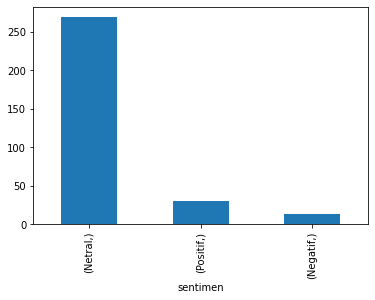

In [127]:
df1 = pd.DataFrame(prediksi, columns=['sentimen'])
df1.value_counts().plot(kind='bar')

In [128]:
nb = MultinomialNB().fit(trainset, y_train)
prediksi = nb.predict(x_test)

ValueError: setting an array element with a sequence.

In [3]:
#convert string to list
#def convert(tweets):
#    tweets = ast.literal_eval(tweets)
#    return [tweet for tweet in tweets]

#df["list_tweet"] = df["tweet"].apply(convert)
#print(df["list_tweet"])

#print("\ntype : ", type(df["list_tweet"]))

In [4]:
#rows = df.sample(frac=.25)
#if (0.25*(len(df))== len(rows)):
#    print( "Cool")
#    print(len(df), len(rows))
  
# display
#rows

In [9]:
# Check TF result
#index = 1

#print('%20s' % "term", "\t", "TF\n")
#for key in df["TF_dict"][index]:
 #   print('%20s' % key, "\t", df["TF_dict"][index][key])

In [22]:
#df[["TF-IDF_dict", "sentimen"]].head()
#df["TF-IDF_dict"].loc[df['sentimen'] == 'positif']
#df["TF-IDF_dict"].loc[df['sentimen'] == 'negatif']
#df["TF-IDF_dict"].loc[df['sentimen'] == 'netral']


In [18]:
#from sklearn.feature_selection import chi2

#N=5
#Number=1
#for kategori in df['sentimen'].unique():
#    features_chi2 = chi2(hasil_tfidf, df["sentimen"] == kategori)
#    indices = np.argsort(features_chi2[0])
#    feature_names = np.array(calc_TF_IDF.get_feature_names())[indicase]
    
    

In [19]:
new = df["TF-IDF_dict"].apply(pd.Series)
new_df = new.fillna(0)
new_df

,kesehatan,vaksin,terkini,viralkan,cerita,sebenar,kongsi,sayangkan,ummah,i,...,inggris,majority,kalangan,bermasalah,beli,carpet,kelan,pharmaniaga,sinnovac,china
0,0.418280,0.026462,0.512424,0.557476,0.390356,0.557476,0.557476,0.557476,0.557476,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.342229,0.021651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.660179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.000000,0.029770,0.000000,0.000000,0.439150,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.047631,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.000000,0.036639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
298,0.000000,0.054959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
299,0.000000,0.119078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
300,0.000000,0.039693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.836213,0.836213,0.836213


In [11]:
#def convert(TF_IDF_Dict):
#    data = [] 
#    for item in hasil_tfidf:
#        for key, value in hasil_tfidf.items():
#            data = list(zip(value.keys(), value.values()))
#            return data
        
#df["TFIDF"] = df["TF-IDF_dict"].apply(convert)
#df["TFIDF"].head(10)

In [12]:
#dt = df["TF-IDF_dict"]
#dataf = pd.DataFrame(dt)
#convert = dataf.to_string()
#convert

In [13]:
# Cek hasil TF-IDF
#index = 90

#print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
#for key in df["TF-IDF_dict"][index]:
 #   print('%20s' % key, "\t", df["TF_dict"][index][key] ,"\t" , df["TF-IDF_dict"][index][key])

In [17]:
x = df["TF_IDF_Vec"]
y = df['sentimen']

In [18]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


print("total Training Data :", y_train.shape)
print("total Testing Data :", y_test.shape)

total Training Data : (241,)
total Testing Data : (61,)


In [19]:
y_train.value_counts(ascending=True)

netral     76
positif    80
negatif    85
Name: sentimen, dtype: int64

In [20]:
y_test.value_counts(ascending=True)

negatif    16
positif    20
netral     25
Name: sentimen, dtype: int64

In [21]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
prediksi = nb.predict(x_test)

#nb = MultinomialNB().fit(x_train,y_train)
#prediksi = nb.predict(x_test)

ValueError: setting an array element with a sequence.

In [27]:
print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

     negatif       0.62      0.65      0.63        20
      netral       0.52      0.58      0.55        19
     positif       0.58      0.50      0.54        22

    accuracy                           0.57        61
   macro avg       0.57      0.58      0.57        61
weighted avg       0.57      0.57      0.57        61



In [28]:
print (accuracy_score(y_test, prediksi))

0.5737704918032787


In [29]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [31]:
import pickle

In [32]:
filename = 'model_analisis.pkl'
pickle.dump(model, open(filename, 'wb'))

In [33]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.5737704918032787


In [34]:
predict = loaded_model.predict(x_test)
print(predict)

['positif' 'negatif' 'netral' 'positif' 'negatif' 'netral' 'negatif'
 'negatif' 'positif' 'negatif' 'netral' 'negatif' 'negatif' 'negatif'
 'netral' 'negatif' 'negatif' 'netral' 'netral' 'netral' 'positif'
 'positif' 'positif' 'positif' 'netral' 'positif' 'positif' 'netral'
 'positif' 'negatif' 'positif' 'positif' 'negatif' 'netral' 'negatif'
 'negatif' 'netral' 'negatif' 'netral' 'negatif' 'positif' 'negatif'
 'netral' 'netral' 'negatif' 'positif' 'netral' 'negatif' 'netral'
 'negatif' 'negatif' 'negatif' 'netral' 'positif' 'positif' 'negatif'
 'netral' 'positif' 'netral' 'positif' 'netral']


<AxesSubplot:xlabel='sentimen'>

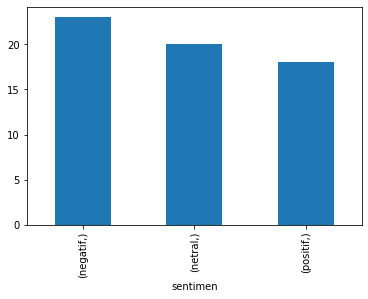

In [35]:
df1 = pd.DataFrame(predict, columns=['sentimen'])
df1.value_counts().plot(kind='bar')